In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def equalizar_histograma(imagem):

    # Obtem o histograma da imagem calculando para 256 
    hist, bins = np.histogram(imagem.flatten(), 256, [0,256])


    # Normalizamos o histograma dividindo cada valor pelo numero de pixel
    # da imagem, obtendo a distribuição de probabilidades de intensidade
    hist_normalizado = hist / float(imagem.shape[0]*imagem.shape[1])

    # Calculamos a CDF do histograma normalizado, fazendo a soma acumulada dos
    # valores. Utilizamos a função cumsum() que realiza a soma acumulada
    cdf = hist_normalizado.cumsum()

    # Multiplicamos a CDF pelo valor maximo de intensidade 255, isso cria um
    # mapeamento dos valores originais de intensidade para as valores equalizadas.
    # alem de convertermos para o tipo de dado 'uint8'
    mapa = (cdf * 255).astype('uint8')

    # Usamos o mapeamento para mapear os valores de intensidade da imagem original
    # para para os valores equalizados. 
    imagem_equalizada = mapa[imagem]

    return imagem_equalizada, mapa, hist_normalizado

In [4]:
def plot_histograms(image, equalized_image, hist, equalized_hist):
    plt.figure(figsize=(12, 6))

    plt.subplot(2, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(2, 2, 2)
    plt.imshow(equalized_image, cmap='gray')
    plt.title('Equalized Image')
    plt.axis('off')

    plt.subplot(2, 2, 3)
    #plt.plot(hist, color='b')
    plt.bar(np.arange(len(hist)), hist, color='b')
    plt.title('Original Histogram')

    plt.subplot(2, 2, 4)
    #plt.plot(equalized_hist, color='b')
    plt.bar(np.arange(len(equalized_hist)), equalized_hist, color='b')
    plt.title('Equalized Histogram')

    plt.tight_layout()
    plt.show()


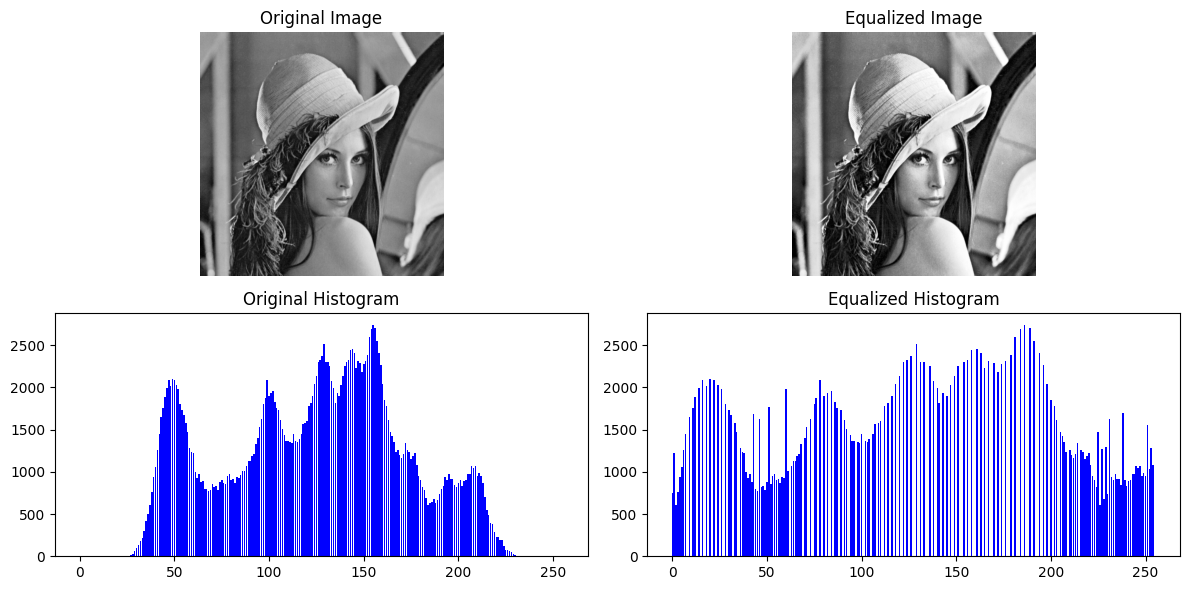

In [5]:
# Carregar a imagem em tons de cinza
imagem = cv2.imread('lena_gray_512.tiff', cv2.IMREAD_GRAYSCALE)

# Equalização do histograma
imagem_equalizada, mapa, hist_normalizado = equalizar_histograma(imagem)

# Calculando histogramas das imagens original e equalizada
hist, _ = np.histogram(imagem.flatten(), 256, [0,256])
equalized_hist, _ = np.histogram(imagem_equalizada.flatten(), 256, [0,256])

# Plotar as imagens e histogramas
plot_histograms(imagem, imagem_equalizada, hist, equalized_hist)